Exercise Sheet 10 **Support Vector Regression**

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [2]:
from sklearn import svm
from sklearn.svm import NuSVR
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV


**10.2: Regression with the $\nu$-SVR**

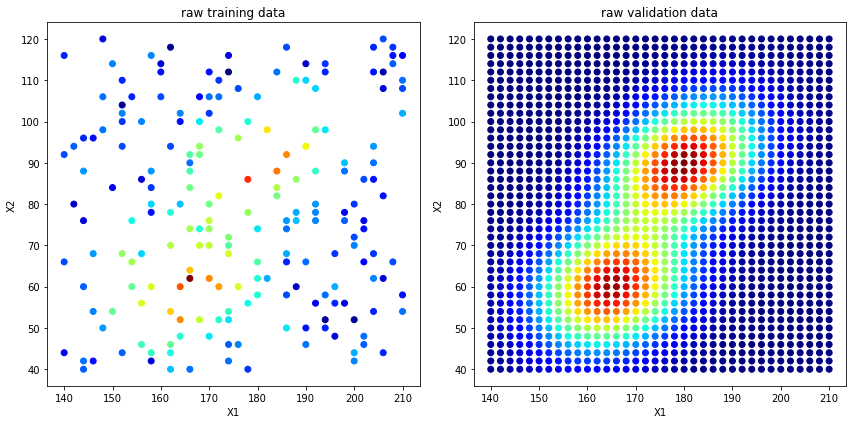

In [3]:
# importing the data
TrainingData = np.genfromtxt('TrainingRidge.csv',
                             delimiter=',',skip_header=1).T
ValidationData = np.genfromtxt('ValidationRidge.csv',
                               delimiter=',',skip_header=1).T

Xt = TrainingData[0:2,:].T
Yt = TrainingData[2,:].T
Xv = ValidationData[0:2,:].T
Yv = ValidationData[2,:].T

# plotting the raw data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(Xt[:,0],Xt[:,1],c=Yt,cmap='jet')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('raw training data')
plt.subplot(1,2,2)
plt.scatter(Xv[:,0],Xv[:,1],c=Yv,cmap='jet')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('raw validation data')
plt.tight_layout()
plt.show()


In [4]:
# the model
NuSVR_model_def = svm.NuSVR(nu=0.5,
                  C=1.0,
                  kernel='rbf',
                  degree=3,
                  gamma='auto',
                  coef0=0.0,
                  shrinking=True,
                  tol=1e-3,
                  cache_size=200,
                  verbose=False,
                  max_iter=-1)


In [5]:
# fitting the model 
NuSVR_model_def.fit(Xt, Yt)

# prediction
yt_predict = NuSVR_model_def.predict(Xt)
yv_predict = NuSVR_model_def.predict(Xv)


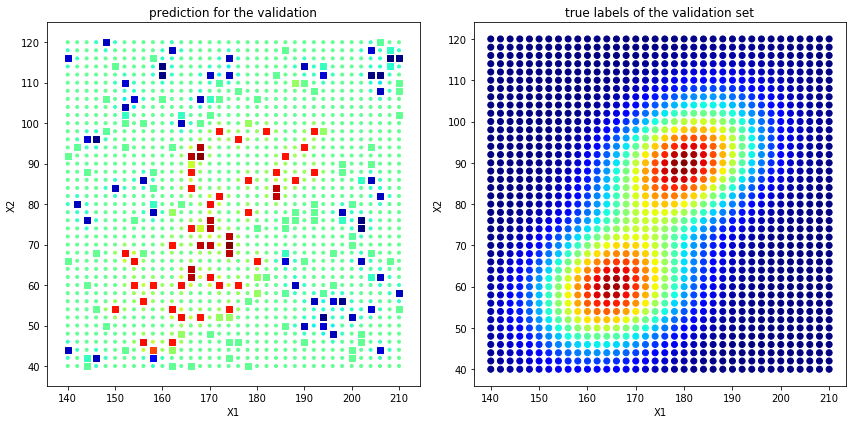

In [6]:
# plotting training vs prediction
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

plt.scatter(Xv[:,0],Xv[:,1],
            c=yv_predict,cmap='jet',
            marker='.')

plt.scatter(Xt[:,0],Xt[:,1],
            c=yt_predict,cmap='jet',
            marker='s')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('prediction for the validation')
plt.subplot(1,2,2)
plt.scatter(Xv[:,0],Xv[:,1],
            c=Yv,cmap='jet')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('true labels of the validation set')
plt.tight_layout()
plt.show()


In [7]:
mset_def = mse(Yv, yv_predict)
print('total mean squared error (MSE) between model prediction'
      ' and true labels of the validation = %d' % mset_def)


total mean squared error (MSE) between model prediction and true labels of the validation = 76


In [8]:
# the steps of one is considered for better search
C_range = np.logspace(-2,12,15,endpoint=True,base=2)
γ_range = np.logspace(-12,0,13,endpoint=True,base=2)


In [9]:
# grid search
param_grid = dict(gamma=γ_range, C=C_range)
grid = GridSearchCV(NuSVR(), param_grid=param_grid, cv=10,
                   scoring='neg_mean_squared_error')
grid.fit(Xt, Yt)
print("The best parameters are %s"% grid.best_params_)


The best parameters are {'C': 16.0, 'gamma': 0.00390625}


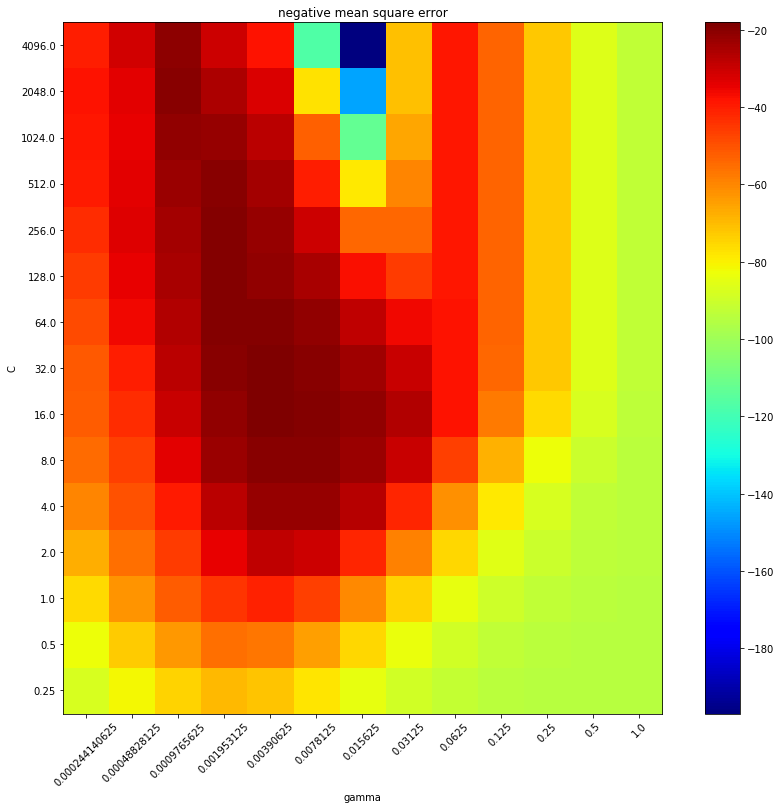

In [10]:
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(γ_range))
plt.figure(figsize=(16, 12))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap='jet',
           origin='lower')
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(γ_range)), γ_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('negative mean square error')
plt.show()


In [11]:
# the model
NuSVR_model_opt = svm.NuSVR(nu=0.5,
                  C=16,
                  kernel='rbf',
                  degree=3,
                  gamma=2**-8,
                  coef0=0.0,
                  shrinking=True,
                  tol=1e-3,
                  cache_size=200,
                  verbose=False,
                  max_iter=-1)


In [12]:
# fitting the model 
NuSVR_model_opt.fit(Xt, Yt)

# prediction
yt_predict_opt = NuSVR_model_opt.predict(Xt)
yv_predict_opt = NuSVR_model_opt.predict(Xv)


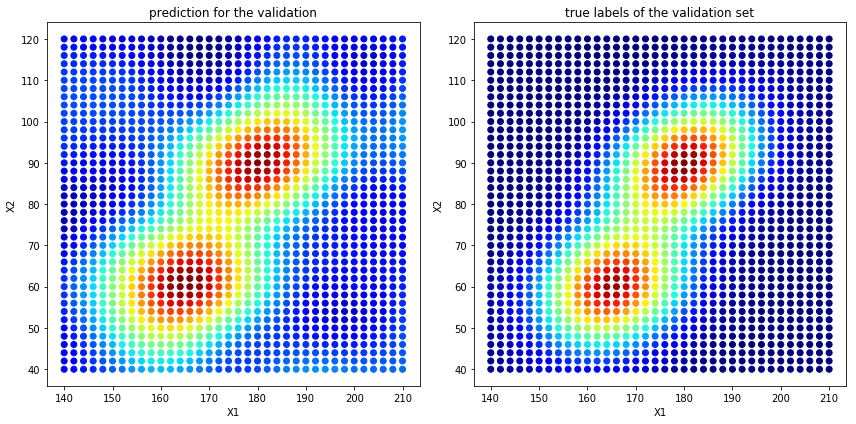

In [13]:
# plotting training vs prediction
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

plt.scatter(Xv[:,0],Xv[:,1],
            c=yv_predict_opt, cmap='jet')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('prediction for the validation')
plt.subplot(1,2,2)
plt.scatter(Xv[:,0],Xv[:,1],
            c=Yv,cmap='jet')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('true labels of the validation set')
plt.tight_layout()
plt.show()


In [14]:
mset_opt = mse(Yv, yv_predict_opt)
print('total mean squared error (MSE) between model prediction'
      ' and true labels of the validation = %d' % mset_opt)


total mean squared error (MSE) between model prediction and true labels of the validation = 2


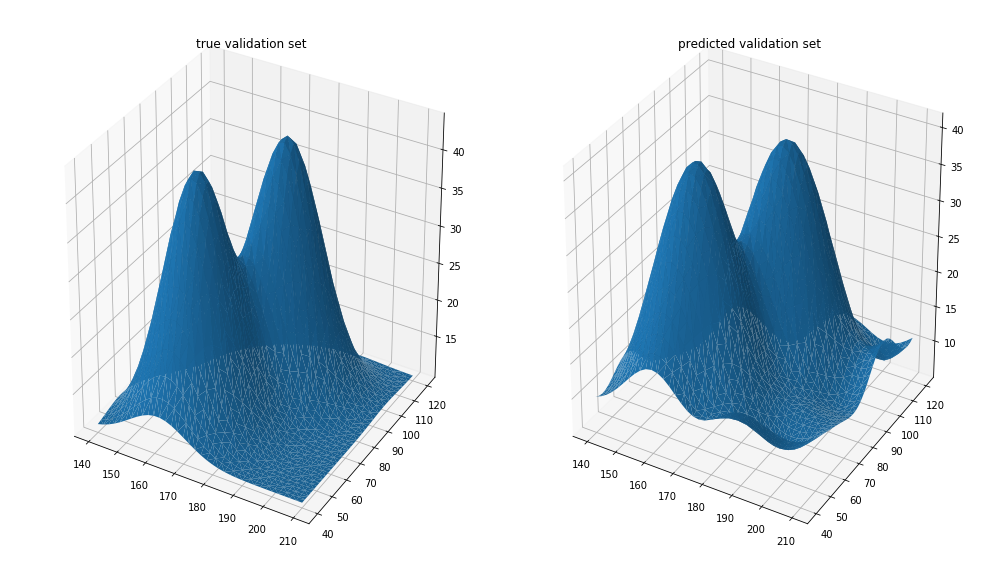

In [15]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(Xv[:,0],Xv[:,1], Yv)
plt.title('true validation set')
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(Xv[:,0],Xv[:,1], yv_predict_opt)
plt.title('predicted validation set')
plt.tight_layout()
plt.show()


In [16]:
print('the mean squre error of using default parameters = %d \n'
      'the mean squre error of using optimum parameters = %d'
      % (mset_def, mset_opt))


the mean squre error of using default parameters = 76 
the mean squre error of using optimum parameters = 2
